# Final Exam Instructions

Instructions are provided as part of a reading along with this final exam. Please ensure that you have read them carefully before attempting this exam.

## Problem 1 (15 points)

In this problem, you are given a binary search tree whose keys are numbers. We would like to convert it to a list of all nodes with keys at depth 1 (root), depth 2 (children of root), and so on. At each depth, the keys must appear from left to right.

The example below will clarify the problem.

### Example

Consider the BST below as input:
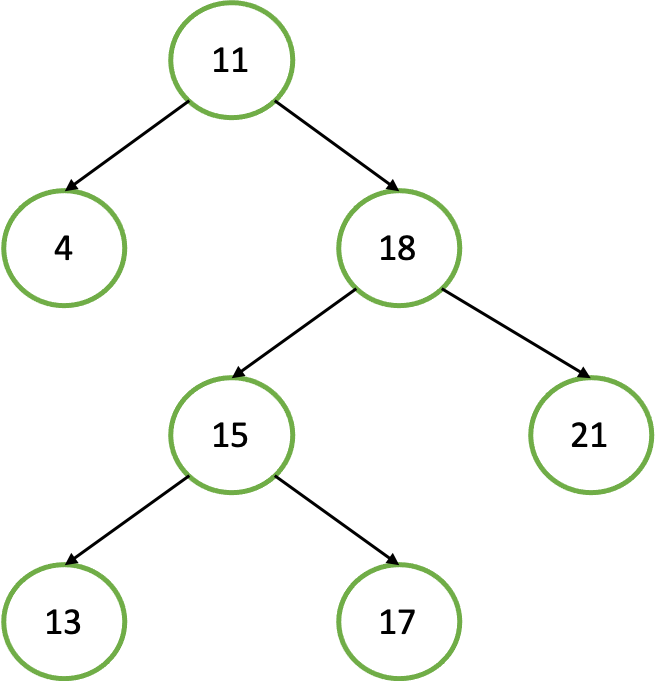

You will need to output the list
~~~
[11, 4, 18, 15, 21, 13, 17]
~~~

Your algorithm should work in time that is linear in the number of nodes of the tree.

For your convenience, we have given you a binary search tree data structure `class TreeNode` with functions for insertion. Please complete the implementation of the `depthWiseTraverse` function.

**Hint** Try doing a breadth first search on a tree. You can use a python list as a "FIFO" (first in first out) queue to implement BFS.

In [3]:
class TreeNode:
    # Constructor for tree nodde
    def __init__(self, key, parent_node=None):
        self.key = key # set the key
        self.parent = parent_node # set the parent_node
        self.left = None # set the left child to None -- no left child to begin with
        self.right = None # set the right child to None - no right child to begin with.
    
    def is_root(self):
        return parent_node == None
    
    # Function: insert
    # insert a node with key `new_key` into the current tree.
    def insert(self, new_key):
        key = self.key 
        if new_key == key:
            print(f'Already inserted key {key}. Ignoring')
        elif new_key < key: # new_key must go into the left subtree
            if self.left == None: # no left child?
                new_node = TreeNode(new_key, self) # create one with self as parent
                self.left = new_node # set the left pointer
            else:
                self.left.insert(new_key) # recursively call insert on left subtree
        else:  # new_key must go into the right subtree.
            assert new_key > key
            if self.right == None: # no right child?
                new_node = TreeNode(new_key, self) # create one
                self.right = new_node
            else: 
                self.right.insert(new_key) # recusively call insert on right subtree.

# TODO: Implement the function depthWiseTraverse below
def depthWiseTraverse(root_node):
    # This function inputs the root node of the tree.
    # root_node is an instance of the TreeNode class provided to you above
    # See description and example above.
    # your code here
    
    # create FIFO Queue, with root node data initialized
    FIFO_queue = []
    visited = []
    return_list = []

    if root_node not in visited:
        FIFO_queue.append(root_node)
        visited.append(root_node)
        #print(FIFO_queue)


    while FIFO_queue:
        # check left child
        if FIFO_queue[0].left != None and FIFO_queue[0].left not in visited:
            print(f"Node: {FIFO_queue[0].key}. Adding left child ({FIFO_queue[0].left.key}) to queue")
            FIFO_queue.append(FIFO_queue[0].left)
            visited.append(FIFO_queue[0].left)
        
        # check right child
        if FIFO_queue[0].right != None and FIFO_queue[0].right not in visited:
            print(f"Node: {FIFO_queue[0].key}. Adding right child ({FIFO_queue[0].right.key}) to queue")
            FIFO_queue.append(FIFO_queue[0].right)
            visited.append(FIFO_queue[0].right)

        # move first node to return list and pop the key
        return_list.append(FIFO_queue[0].key)
        FIFO_queue.pop(0)
        
        #print("Forced break of while loop.")
        #break


    print(f"Final list: {return_list}\n")
    return return_list

In [18]:
def make_tree(insertion_list):
    assert len(insertion_list) > 0
    root_node = TreeNode(insertion_list[0])
    for elt in insertion_list[1:]:
        root_node.insert(elt)
    return root_node

print('-- Test 1 --')
# Same as the example above
tree1 = make_tree([11, 18, 15,  13, 21, 17, 4])
lst1 = depthWiseTraverse(tree1)
print(lst1)
assert lst1 == [11, 4, 18, 15, 21, 13, 17]

print('-- Test 2 --')

tree2 = make_tree([3, 1, 2, 4, 6, 7])
lst2 = depthWiseTraverse(tree2)
print(lst2)
assert lst2 == [3, 1, 4, 2, 6, 7]

print('-- Test 3 --')
tree3 = make_tree([7, 3, 1, 2, 4, 6, 15, 8, 11, 10, 9])
lst3 = depthWiseTraverse(tree3)
print(lst3)
assert lst3 == [7, 3, 15, 1, 4, 8, 2, 6, 11, 10, 9]

print('All tests passed: 15 points')

-- Test 1 --
Node: 11. Adding left child (4) to queue
Node: 11. Adding right child (18) to queue
Node: 18. Adding left child (15) to queue
Node: 18. Adding right child (21) to queue
Node: 15. Adding left child (13) to queue
Node: 15. Adding right child (17) to queue
Final list: [11, 4, 18, 15, 21, 13, 17]

[11, 4, 18, 15, 21, 13, 17]
-- Test 2 --
Node: 3. Adding left child (1) to queue
Node: 3. Adding right child (4) to queue
Node: 1. Adding right child (2) to queue
Node: 4. Adding right child (6) to queue
Node: 6. Adding right child (7) to queue
Final list: [3, 1, 4, 2, 6, 7]

[3, 1, 4, 2, 6, 7]
-- Test 3 --
Node: 7. Adding left child (3) to queue
Node: 7. Adding right child (15) to queue
Node: 3. Adding left child (1) to queue
Node: 3. Adding right child (4) to queue
Node: 15. Adding left child (8) to queue
Node: 1. Adding right child (2) to queue
Node: 4. Adding right child (6) to queue
Node: 8. Adding right child (11) to queue
Node: 11. Adding left child (10) to queue
Node: 10. Add

## Problem 2 (15 points)

Once again consider a binary search tree (BST) whose keys are numbers. Given such a BST, you are asked to compute the sum along each branch from root to a leaf node starting with the leftmost branch and moving on to the rightmost.
  - For the purposes of this problem a leaf node is defined as having neither a left child nor a right child.

The example below will clarify the problem.

### Example

Consider the BST below as input:
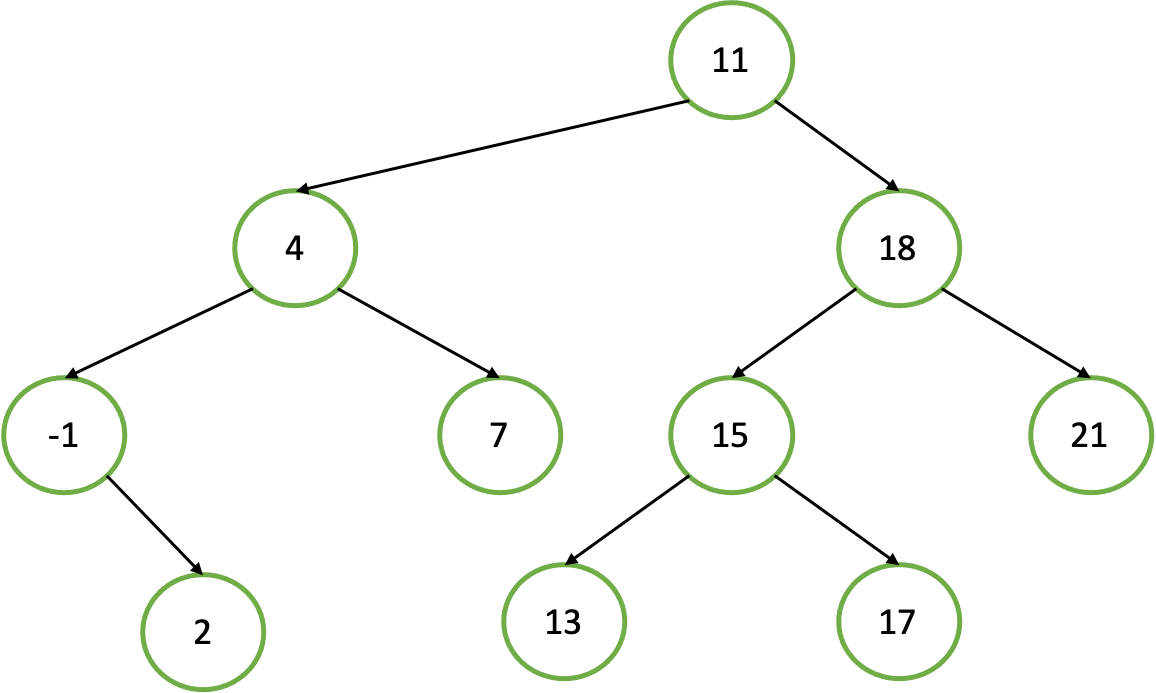

You will need to output the list
~~~
[16, 22, 57, 61, 50]
~~~

Note: 
  - 16 = 11 + 4 -1 + 2
  - 22 = 11 + 4 + 7
  - 57 = 11 + 18 + 15 + 13
  - 61 = 11 + 18 + 15 + 17
  - 50 = 11 + 18 + 21

Your algorithm should work in time that is linear in the number of nodes of the tree.

For your convenience, we will reuse the binary search tree data structure `class TreeNode` with functions for insertion from the previous problem. Please ensure that you have run the cell corresponding to that problem.

Please complete the implementation of the `sumOfBranches` function.




In [63]:
def sumOfBranches(root_node):
    # return a list of sums 
    # your code here
    
    stack = []
    visited = []
    running_sum = 0
    return_list = []

    # add the root node to visited
    if root_node not in visited:
        stack.append(root_node)
        visited.append(root_node)
        #running_sum += root_node.key
    
    
    while stack:
        node = stack.pop(0)
        running_sum += node.key
        #print(f"Node: {node.key}, sum: {running_sum}")

        """
        # Display children nodes
        if node.left != None:
            print(f"Left child: {node.left.key}")
        if node.right != None:
            print(f"Right child: {node.right.key}")
        """
            
        # If the tree has been explored and we are back on the node break the while loop
        if node.parent == None and node.right in visited:
            break
        
        if node.left != None and node.left not in visited:
            #print(f"Adding {node.left.key} to stack.")
            stack.append(node.left)
            #visited.append(node.left)

        if node.right != None and node.right not in visited:
            if node.left == None or node.left in visited:
                #print(f"Adding {node.right.key} to stack")
                stack.append(node.right)
                #visited.append(node.right)

        #visited.append(node)

        if node.left == None and node.right == None:
            print(f"\nAppending sum: {running_sum}.\n")
            return_list.append(running_sum)
            # fix for test 3 (no parent node to move to)
            if node.parent == None:
                break
            running_sum -= node.key
            running_sum -= node.parent.key
            #print('Moving up tree.')
            stack.append(node.parent)

        if node.left in visited and node.right in visited:
            running_sum -= node.key
            running_sum -= node.parent.key
            #print('Moving up tree.')
            stack.append(node.parent)

        if node.right in visited and node.left == None:
            running_sum -= node.key
            running_sum -= node.parent.key
            #print('Moving up tree.')
            stack.append(node.parent)
        
        visited.append(node)

    return return_list

In [64]:
def make_tree(insertion_list):
    assert len(insertion_list) > 0
    root_node = TreeNode(insertion_list[0])
    for elt in insertion_list[1:]:
        root_node.insert(elt)
    return root_node

print('-- Test 1 --')
# Same as the example from problem 1
tree1 = make_tree([11, 18, 15,  13, 21, 17, 4])
lst1 = sumOfBranches(tree1)
print(lst1)
assert lst1 == [15, 57, 61, 50]

print('-- Test 2 --')
# Same as example from problem 2

tree2 = make_tree([11,4, 18, -1, 7, 15, 21, 2, 13, 17])
lst2 = sumOfBranches(tree2)
print(lst2)
assert lst2 == [16, 22, 57, 61, 50]

print('-- Test 3 --')
tree3 = make_tree([15])
lst3 = sumOfBranches(tree3)
print(lst3)
assert lst3 == [15]

print('-- Test 4 --')
tree4 = make_tree([4, 1, 2, 3, 8, 5, 6, 7,  10, 9])
lst4 = sumOfBranches(tree4)
print(lst4)
assert lst4 == [10, 30, 31]

print('All tests passed: 15 points!')

-- Test 1 --

Appending sum: 15.


Appending sum: 57.


Appending sum: 61.


Appending sum: 50.

[15, 57, 61, 50]
-- Test 2 --

Appending sum: 16.


Appending sum: 22.


Appending sum: 57.


Appending sum: 61.


Appending sum: 50.

[16, 22, 57, 61, 50]
-- Test 3 --

Appending sum: 15.

[15]
-- Test 4 --

Appending sum: 10.


Appending sum: 30.


Appending sum: 31.

[10, 30, 31]
All tests passed: 15 points!


## Problem 3 (15 points)

We have a rectangular grid of points where one corner is $(0,0)$ and the other corner is $(W,H)$, where $W,H$ represent the width and height of the grid, respectively. From each point $(x,y)$, we can move along one of the cardinal directions to $$(x', y') \in \left\{ (x+1, y), (x-1, y), (x, y+1), (x, y-1) \right\},$$ as long as $0 \leq x' \leq W$ and $0 \leq y' \leq H$ (i.e, we are not allowed to move out of the grid). 

Furthermore, we specify a set of $k$ circles $$C = \left\{(x_1, y_1, r_1), \ldots, (x_k, y_k, r_k ) \right\}$$
where each circle has center $(x_i, y_i)$ and radius $r_i$.

The goal is to find a path from $(0,0)$ to $(W,H)$ while avoiding any point on the surface of or inside the circles in $C$. If such a path is found, your algorithm should return the path as a list of grid points. If not, your algorithm should return the empty list.

### Example 1

Consider $W = H = 3$ and two circles $C= \{ (1,2,1), (2,2,0.5) \}$.
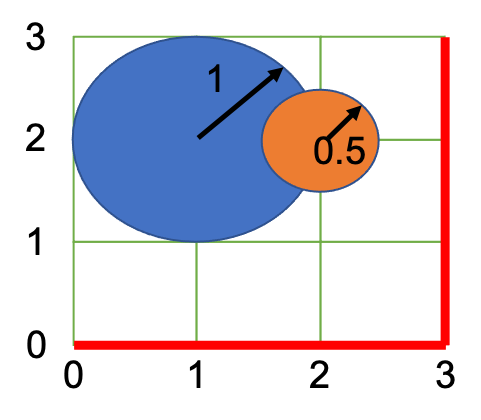

The red lines show a path from $(0,0)$ to $(3,3)$. Your algorithm may return a list
`[(0,0), (1,0), (2,0), (3, 0), (3,1), (3,2), (3,3) ]` (there is another path in this case and any of them may be returned.




#### Example 2
Consider $W = H = 3$ and two circles $C= \{ (1,2,1), (2,2,1) \}$.
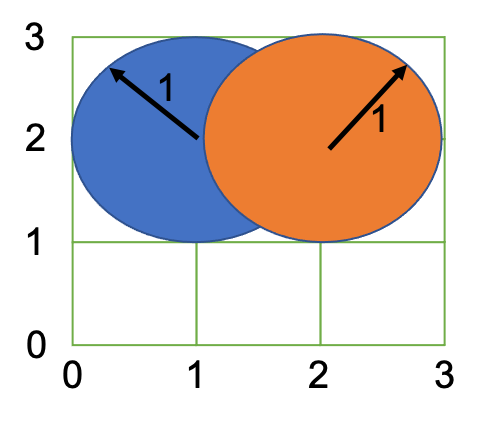

There are no paths in this case (in particular (3,2) lies on the orange circle though this is not 100% clear from the picture). Your algorithm should return the empty list.


In [8]:
from math import sqrt

# You may use this function to test if a point lies inside given circle.
def ptInCircle(x,y, circles_list):
    for (xc,yc,rc) in circles_list:
        d = sqrt ( (x-xc)**2 + (y-yc)**2)
        if d <= rc:
            return True
    return False
"""
def BFS(graph, source, dest):

    queue = [source]
    visited = []

    print(graph.edges)

    while queue:
        node = queue.pop(0)
        print(f"Node: {node}")
        if node not in visited:
            print(f"neighbors?: {graph.edges[node]}")
            neighbors = graph.edges

            for neighbor in neighbors:
                new_path = list()
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == dest:
                    print(new_path)
                    return
            visited.append(node)
    print("Valid path does not exist.")
    return
"""  

class UndirectedGraph:

    def __init__(self, n) -> None:
        self.n = n
        self.edges = []


    def add_edge(self, start, end):
        self.edges.append((start, end))
        #print(f"Adding edge: ({start}, {end})")


def findPath(width, height, forbidden_circles_list):
    # width is a positive number
    # height is a positive number
    # forbidden_circles_list is a list of triples [(x1, y1, r1),..., (xk, yk, rk)]
    assert width >= 1
    assert height >= 1
    assert all(x <= width and x >=0 and y <= height and y >= 0 and r > 0 for (x,y,r) in forbidden_circles_list)
    # your code here

    # Initialize all the values
    valid_points = []
    source = (0, 0)
    dest = (width, height)
    vertices = (width + 1) * (height + 1)
    graph = UndirectedGraph(vertices)

    print(f"Graph: {width + 1} x {height + 1}, vertices: {vertices}, start: {source}, dest: {dest}")
    
    print(f"Circles: {circles}")

    # Create list of all points that are not in or touching a circle
    for y in range (0, height + 1):
        for x in range (0, width + 1):
            #print(f"(X,Y): ({x}, {y})")
            #print(ptInCircle(x, y, circles))
            if ptInCircle(x, y, circles) == False:
                valid_points.append((x, y))

    
    print(f"{len(valid_points)} valid points: {valid_points}")
    for point in valid_points:
        #print(f"Testing point: {point[0], point[1]}")

        # look for points in a cardinal direction to add an edge.
        # north
        if (point[0] + 1, point[1]) in valid_points and (point[0] + 1, point[1]) not in graph.edges:
            #print(f"Add edge for {point[0] + 1}, {point[1]}")
            graph.add_edge((point[0], point[1]), (point[0] + 1, point[1]))
        # south
        #if (point[0] - 1, point[1]) in valid_points and (point[0] - 1, point[1]) not in graph.edges:    
            #print(f"Add edge for {point[0] - 1}, {point[1]}")
            #graph.add_edge((point[0], point[1]), (point[0] - 1, point[1]))
        # east
        if (point[0], point[1] + 1) in valid_points and (point[0], point[1] + 1) not in graph.edges:
            #print(f"Add edge for {point[0]}, {point[1] + 1}")
            graph.add_edge((point[0], point[1]), (point[0], point[1] + 1))
        # west
        #if (point[0], point[1] - 1) in valid_points and (point[0], point[1] - 1) not in graph.edges:
            #print(f"Add edge for {point[0]}, {point[1] - 1}")
            #graph.add_edge((point[0], point[1]), (point[0], point[1] - 1))

    print("\nEdges\n")
    for edge in graph.edges:
        print(f"{edge[0]}, {edge[1]}")


    graph_dict = {}
    for node in range(len(graph.edges)):
        graph_dict[graph.edges[node][0]] = graph.edges[node][1]

    print(graph_dict)


    nodes = graph_dict.keys()

    for entry in nodes:
        print(graph_dict[entry])



    queue = [graph_dict[(0, 0)]]
    visited = []
    bfs_traversal = []
    
    while queue:
        vertex = queue.pop(0)
        bfs_traversal.append(vertex)
        
        for neighbor in graph_dict[vertex]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    print(bfs_traversal)

    # dijkstra's algorithm?


In [9]:
print('-- Test 1 -- ')

circles = [(2,2,0.5), (1,2,1)]
p = findPath(3, 3, circles)
print(p)

-- Test 1 -- 
Graph: 4 x 4, vertices: 16, start: (0, 0), dest: (3, 3)
Circles: [(2, 2, 0.5), (1, 2, 1)]
11 valid points: [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (2, 1), (3, 1), (3, 2), (0, 3), (2, 3), (3, 3)]

Edges

(0, 0), (1, 0)
(0, 0), (0, 1)
(1, 0), (2, 0)
(2, 0), (3, 0)
(2, 0), (2, 1)
(3, 0), (3, 1)
(2, 1), (3, 1)
(3, 1), (3, 2)
(3, 2), (3, 3)
(2, 3), (3, 3)
{(0, 0): (0, 1), (1, 0): (2, 0), (2, 0): (2, 1), (3, 0): (3, 1), (2, 1): (3, 1), (3, 1): (3, 2), (3, 2): (3, 3), (2, 3): (3, 3)}
(0, 1) 

(2, 0) 

(2, 1) 

(3, 1) 

(3, 1) 

(3, 2) 

(3, 3) 

(3, 3) 



KeyError: (0, 1)

In [249]:
def checkPath(width, height, circles, path):
    assert path[0] == (0,0), 'Path must begin at (0,0)'
    assert path[-1] == (width, height), f'Path must end at {(width, height)}'
    (cur_x, cur_y) = path[0]
    for (new_x, new_y) in path[1:]:
        dx = new_x - cur_x
        dy = new_y - cur_y
        assert (dx,dy) in [(1,0),(-1,0), (0,1),(0,-1)]
        assert 0 <= new_x and new_x <= width
        assert 0 <= new_y and new_y <= height
        assert not ptInCircle(new_x, new_y, circles)
        cur_x, cur_y = new_x, new_y
    return
print('-- Test 1 -- ')

circles = [(2,2,0.5), (1,2,1)]
p = findPath(3, 3, circles)
print(p)
checkPath(3, 3, circles, p)
print('-- Test 2 -- ')

circles1 = [(2,2,1), (1,2,1)]
p1 = findPath(3, 3, circles1)
print(p1)
assert p1 == [], 'Answer does not match with ours'

print('-- Test 3 -- ')
p2 = findPath(5,5, circles1)
print(p2)
checkPath(5, 5, circles1, p2)

print('-- Test 4 --')

circles3 = [(1,2,0.5), (2,2,1), (3,3,1),(4,3,1)]
p3 = findPath(5, 5, circles3)
print(p3)
checkPath(5, 5, circles3, p3)

print('-- Test 5 --')
circles5 = [ (4,1, 1), (4,4,1),(2,6,1)]
p5 = findPath(6,6,circles5)
print(p5)
assert p5 == []
print('All tests passed: 15 points!')

: 

: 

### That's All Folks!